# Quantum Full Adder

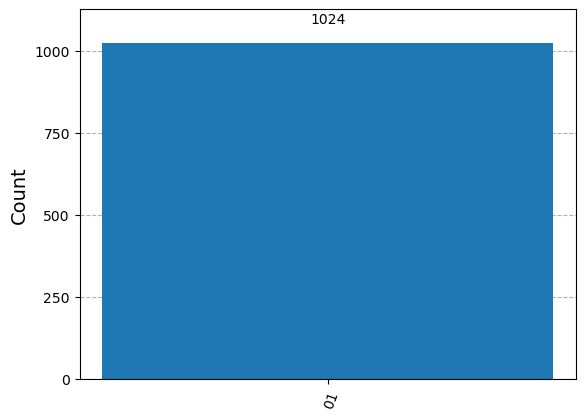

In [150]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Function to create a 2-qubit ripple carry adder
def ripple_carry_adder():
    qc = QuantumCircuit(11, 2)  
    # Example input  
    qc.x(0)
    qc.x(1)  
    qc.x(2)  

    # Ripple Carry Adder Logic
    # Quantum Sum
    qc.cx(1,3)
    qc.cx(2,3)
    qc.cx(0,4)
    qc.cx(3,4)
    # Measure the output
    qc.measure(4,0)
    
    # Quantum Carry       
    qc.ccx(0, 3, 5)  
    qc.ccx(1, 2, 6)
    qc.ccx(5,6,7) 
    qc.cx(5,7) 
    qc.cx(6,7) 
    # Measure the output
    qc.measure(7, 1)  

    return qc

# Run the circuit
qc = ripple_carry_adder()
sim = Aer.get_backend('qasm_simulator')
result = sim.run(qc,shots=1024).result()
counts = result.get_counts()

# Display results
plot_histogram(counts)


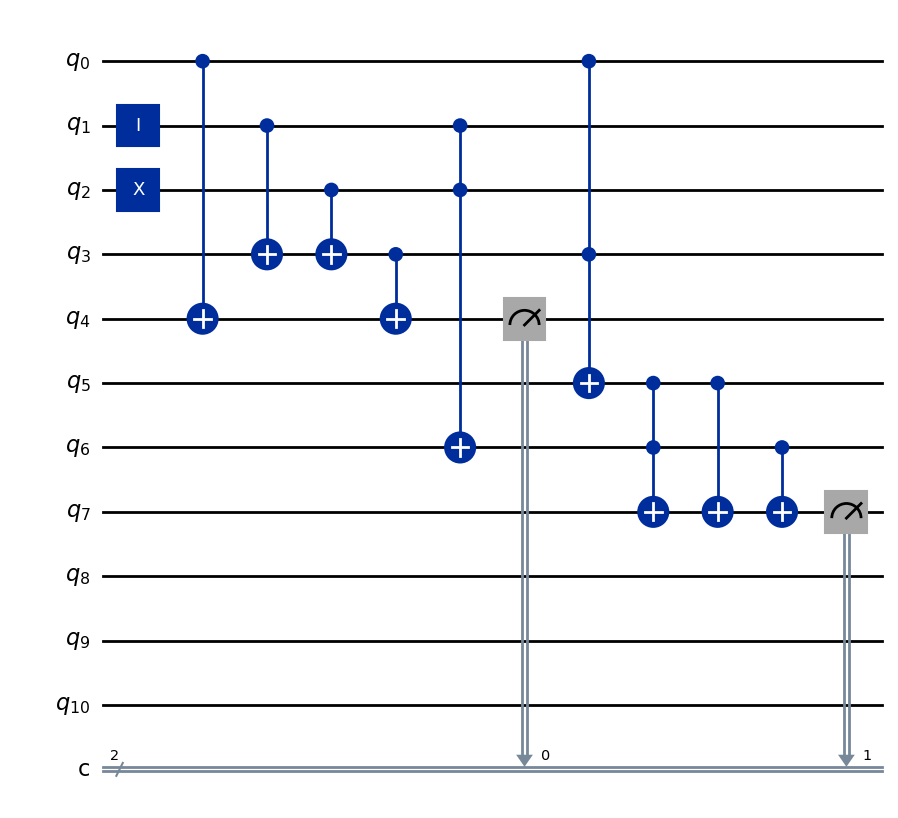

In [152]:
qc.draw('mpl')

# see https://bit.ly/34BY6AD

# Quantum Ripple-Carry Adder

In [ ]:
Note the qubits on the simulator Quirk have a different order.Rather than taking |a⟩|b⟩|c⟩→|a⟩|s⟩|c⟩,
the circuit takes |b4⟩|b3⟩|a3⟩|c3⟩|b2⟩|a2⟩|c2⟩|b1⟩|a1⟩|c1⟩|b0⟩|a0⟩|c0⟩
                                   to
                  |s4⟩|s3⟩|a3⟩|c3⟩|s2⟩|a2⟩|c2⟩|s1⟩|a1⟩|c1⟩|s0⟩|a0⟩|c0⟩.
 
Verifying our quantum circuit in Quirk by adding |a⟩ = |1011⟩ and |b⟩ =
|01110⟩, which should result in |s⟩ = |11001⟩. With the qubit ordering from above,
where all the carry qubits are |0⟩ at the start and end of the computation, the quantum
ripple-carry adder should take
|0110100110010⟩ → |1110000010110⟩

# see https://bit.ly/39NzEf9.

# NOT Gate

In [158]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def NOT(input): 
 
    q = QuantumRegister(1) # a qubit in which to encode and manipulate the input 
    c = ClassicalRegister(1) # a bit to store the output 
    qc = QuantumCircuit(q, c) # this is where the quantum program goes 
     
    # Encoding '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
 
    if input=='1': 
        qc.x( q[0] ) 
         
    # Now we've encoded the input, we can do a NOT on it using x 
    qc.x( q[0] ) 
     
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0] 
    qc.measure( q[0], c[0] ) 
     
    # Running the program on a simulator 
    backend = Aer.get_backend('qasm_simulator') 
    # Since the output will be deterministic, we can use just a single shot to get it 
    job = backend.run(qc,shots=1) 
    output = next(iter(job.result().get_counts())) 
     
    return output

print('\nResults for the NOT gate')
for input in ['0','1']:
    print('    Input',input,'gives output',NOT(input)) 


Results for the NOT gate
    Input 0 gives output 1
    Input 1 gives output 0


# AND Gate

In [164]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def AND(input1 , input2): 
 
    q = QuantumRegister(3) # a qubit in which to encode and manipulate the input 
    c = ClassicalRegister(1) # a bit to store the output 
    qc = QuantumCircuit(q, c) # Qunatum Circuit
     
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
 
    if input1=='1': 
        qc.x( q[0] )
    if input2=='1': 
        qc.x( q[1] )     
   
    # Now we've encoded the input, we can do a CCX gate on it
    qc.ccx(q[0],q[1],q[2])
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0] 
    qc.measure( q[2], c[0] ) 
     
    # We'll run the program on a simulator 
    backend = Aer.get_backend('qasm_simulator') 
    # Since the output will be deterministic, we can use just a single shot to get it 
    job = backend.run(qc,shots=1) 
    output = next(iter(job.result().get_counts())) 

    return output
print('\nResults for the AND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Input',input1 , input2,'gives output',AND(input1 , input2)) 


Results for the AND gate
    Input 0 0 gives output 0
    Input 0 1 gives output 0
    Input 1 0 gives output 0
    Input 1 1 gives output 1


# OR Gate

# OR Gate

In [168]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def OR(input1 , input2): 
 
    qr = QuantumRegister(3) # a qubit in which to encode and manipulate the input 
    cr = ClassicalRegister(1) # a bit to store the output 
    Or = QuantumCircuit(qr, cr) # Qunatum Circuit
     
    # Encoding '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
 
    if input1=='1': 
        Or.x( qr[0] )
    if input2=='1': 
        Or.x( qr[1] )     
   
    # Apply the OR gate logic using CNOT and TOFFOLI gates
    Or.ccx(qr[0], qr[1], qr[2])  # Toffoli gate to handle inputs '11'
    Or.cx(qr[0], qr[2])  # CNOT gate for the rest of the cases
    Or.cx(qr[1], qr[2])  # CNOT gate for the rest of the cases
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0] 
    Or.measure( qr[2], cr[0] )
    
    # Simulator 
    backend = Aer.get_backend('qasm_simulator') 
    # Since the output will be deterministic, we can use just a single shot to get it 
    job = backend.run(Or,shots=1) 
    output = next(iter(job.result().get_counts()))
    
    return output

print('\nResults for the OR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('Input',input1 , input2,'gives output',OR(input1 , input2))


Results for the OR gate
Input 0 0 gives output 0
Input 0 1 gives output 1
Input 1 0 gives output 1
Input 1 1 gives output 1


# NOR Gate

In [172]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def NOR(input1 , input2): 
 
    qr = QuantumRegister(3) # a qubit in which to encode and manipulate the input 
    cr = ClassicalRegister(1) # a bit to store the output 
    nor = QuantumCircuit(qr, cr) # Qunatum Circuit
     
    # Encoding '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
 
    if input1=='1': 
        nor.x( qr[0] )
    if input2=='1': 
        nor.x( qr[1] )     
   
    # Apply the OR gate logic using CNOT and TOFFOLI gates
    nor.ccx(qr[0], qr[1], qr[2])  # Toffoli gate to handle inputs '11'
    nor.cx(qr[0], qr[2])  # CNOT gate for the rest of the cases
    nor.cx(qr[1], qr[2])  # CNOT gate for the rest of the cases
    
    # Apply NOT gate to the output qubit to get NOR result
    nor.x(qr[2])
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0] 
    nor.measure( qr[2], cr[0] )
    
    # Simulator 
    backend = Aer.get_backend('qasm_simulator') 
    # Since the output will be deterministic, we can use just a single shot to get it 
    job = backend.run(nor,shots=1) 
    output = next(iter(job.result().get_counts()))
    
    return output